In [1]:
import ddsapi
import xarray as xr
import pandas as pd
import matplotlib
#matplotlib.use('Agg')
from scipy import signal
import os
import datetime
import time
import copy
import shutil
import sys
#sys.path.append('/mnt/nfs/d50/pastel/USERS/lecestres/analyse/')
import netCDF4
from cdo import *
import requests
import numpy as np
import numpy.ma as ma
from datetime import date, datetime, timedelta
from dateutil.relativedelta import relativedelta
#from function_read import *
cdo = Cdo()
import math
from glob import glob
from netCDF4 import num2date, date2num

import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import gaussian_kde

import calendar
import locale
from netCDF4 import num2date, date2num, Dataset
from numpy import dtype
from joblib import Parallel, delayed
import joblib
import matplotlib.pyplot as plt 


In [2]:
data=xr.open_dataset('/data/csp/vt17420/CLINT_proj/ERA5/ERA5_masks/ERA5_mask_UTC_Europe.nc')

In [3]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import proplot as plot
from matplotlib.colors import BoundaryNorm


/tmp/ipykernel_251340/2009443158.py:5: ProplotWarning: rc setting 'color' was renamed to 'meta.color' in version 0.8.
  plot.rc.color = 'black'


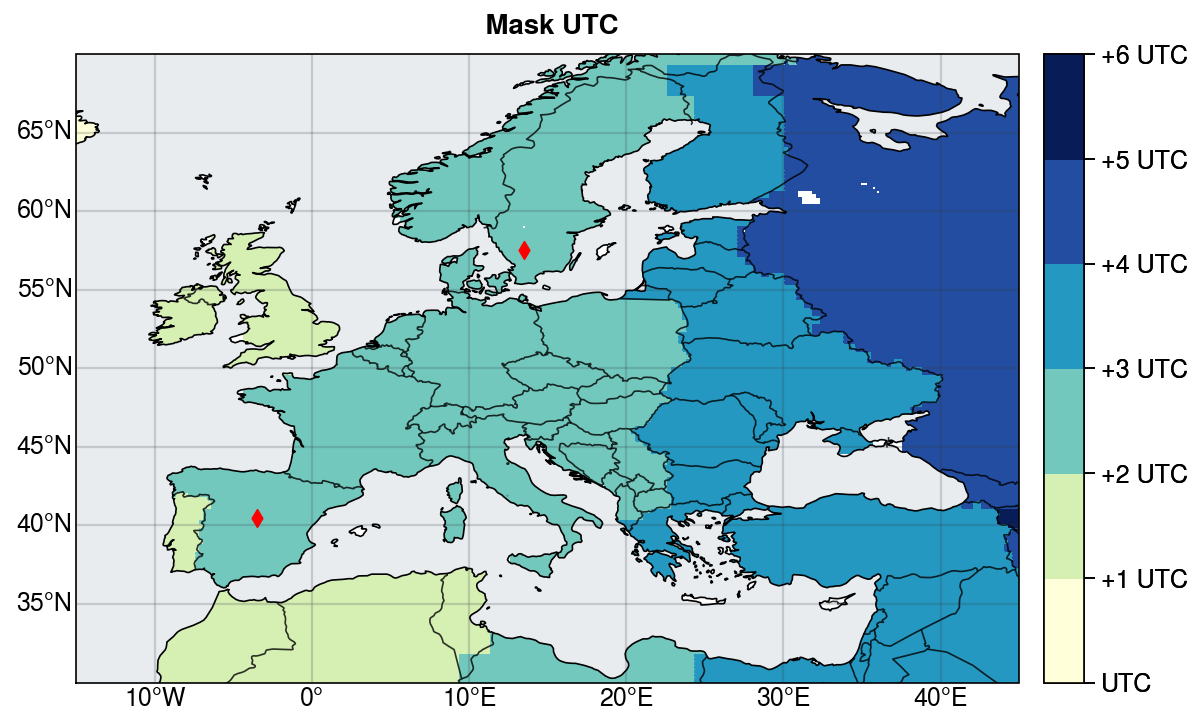

In [8]:
levels = np.arange(0, 7, 1)
cmap = plt.get_cmap('ylgnbu')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
plot.rc['figure.facecolor'] = 'white'
plot.rc.color = 'black'
f, axs = plot.subplots(proj='cyl', width=6)
im = plt.pcolormesh(data.lon,data.lat, data.mask_utc, cmap=cmap, norm=norm)
plt.scatter(x=-3.5,y=40.5,color='red',s=20,marker='d')
plt.scatter(x=13.5,y=57.5,color='red',s=20,marker='d')

axs.format(lonlim=(-15, 45), latlim=(30, 70),gridlinewidth=0.8, gridcolor='gray8',gridalpha=0.2, labels=True, 
           coast=True, suptitle=" Mask UTC", ocean=True, oceancolor='gray2',reso='med',)
axs.add_feature(cfeature.BORDERS, linestyle='-', alpha=.8)
cbar=f.colorbar(im, label="" ,ticks=[0,1,2,3,4,5,6])
cbar.ax.set_yticklabels(['UTC', '+1 UTC', '+2 UTC','+3 UTC', '+4 UTC','+5 UTC', '+6 UTC'])  
plt.savefig('/work/csp/vt17420/map_UTC_locations.png',bbox_inches="tight", dpi=300)


In [23]:
data

<xarray.Dataset>
Dimensions:   (lat: 181, lon: 301)
Coordinates:
  * lon       (lon) float64 -15.0 -14.75 -14.5 -14.25 ... 59.25 59.5 59.75 60.0
  * lat       (lat) float64 25.0 25.25 25.5 25.75 26.0 ... 69.25 69.5 69.75 70.0
Data variables:
    mask_utc  (lat, lon) float64 nan 1.0 1.0 1.0 1.0 1.0 ... nan nan nan nan nan